In [5]:
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.applications import resnet50, inception_resnet_v2, xception
#preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_res = ResNet50(weights='imagenet')
model_x = Xception(weights='imagenet')
model_ir = InceptionResNetV2(weights = 'imagenet')

Resnet Predicted: [('n03930630', 'pickup', 0.49519032), ('n03770679', 'minivan', 0.10615115), ('n04037443', 'racer', 0.074606925)]
Xception Predicted: [('n03196217', 'digital_clock', 0.01558123), ('n02667093', 'abaya', 0.015495464), ('n03729826', 'matchstick', 0.013240896)]
Inception ResNet Predicted: [('n03196217', 'digital_clock', 0.42824349), ('n04009552', 'projector', 0.020577507), ('n03590841', "jack-o'-lantern", 0.017107306)]


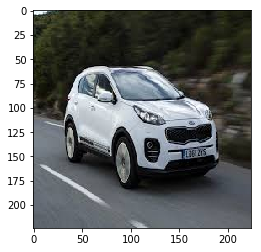

In [7]:
img_path = 'images/car.jpg'
img224 = image.load_img(img_path, target_size=(224, 224))
img299 = image.load_img(img_path, target_size=(299, 299))
img_arr224 = image.img_to_array(img224)
img_arr224 = np.expand_dims(img_arr224, axis=0)

img_arr299 = image.img_to_array(img299)
img_arr299 = np.expand_dims(img_arr299, axis=0)

img_res = resnet50.preprocess_input(img_arr224)
img_x = xception.preprocess_input(img_arr299)
img_ir = inception_resnet_v2.preprocess_input(img_arr299)


preds_res = model_res.predict(img_res)
preds_x = model_x.predict(img_x)
preds_ir = model_ir.predict(img_ir)

# decode the results into a list of tuples (class, description, probability)
print('Resnet Predicted:', resnet50.decode_predictions(preds_res, top=3)[0])
print('Xception Predicted:', xception.decode_predictions(preds_x, top=3)[0])
print('Inception ResNet Predicted:', inception_resnet_v2.decode_predictions(preds_ir, top=3)[0])

plt.imshow(img224)